<img src="http://www.reeem.org/wp-content/uploads/2017/10/cropped-reeem-logo-transparent.png" width="300" style="float: left">
<img src="http://reiner-lemoine-institut.de//wp-content/uploads/2015/09/rlilogo.png" width="100" style="float: right">

# REEEM-DB - OSeMBE

__copyright__ 	= "© Reiner Lemoine Institut" <br>
__license__ 	= "GNU Affero General Public License Version 3 (AGPL-3.0)" <br>
__url__ 		= "https://www.gnu.org/licenses/agpl-3.0.en.html" <br>
__author__ 		= "Ludwig Hülk" <br>

# Import

In [1]:
# basic
import sys
import os
import getpass
import pandas as pd
import numpy as np
import json
import pathlib
from sqlalchemy import *
# plot
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import plotly.graph_objs as go
import plotly.offline as pltly
import colorlover as cl
import seaborn as sns
# notebook
from IPython.display import Image
from IPython.core.display import HTML 

pltly.init_notebook_mode(connected=True)
%matplotlib inline

version = 'v0.2.0'
project = 'REEEM'

# Database Connection

This function creates a database connection to the **reeem_db**.<br>
The default user is **reeem_vis**, a user that has only read rights.

This section establishes the database connection and asks for the **password**.<br>
The username can be changed in the corresponding function above.<br>
If you don't have a username or forgot your password please contact your database admins.

In [2]:
def reeem_session():
    """SQLAlchemy session object with valid connection to reeem database"""
    
    print('Please provide connection parameters to database:\n' +
              'Hit [Enter] to take defaults')
    host = '130.226.55.43' # input('host (default 130.226.55.43): ')
    port = '5432' # input('port (default 5432): ')
    database = 'reeem' # input("database name (default 'reeem'): ")
    user = 'reeem_vis' # input('user (default postgres): ')
    # password = input('password: ')
    password = getpass.getpass(prompt='password: ',
                                   stream=sys.stderr)
    con = create_engine(
            'postgresql://' + '%s:%s@%s:%s/%s' % (user,
                                                  password,
                                                  host,
                                                  port,
                                                  database)).connect()
    print('Password correct! Database connection established.')
    return con

con = reeem_session()

C:\Anaconda3\envs\reeem-vis\lib\site-packages\ipykernel_launcher.py:12: UserWarning:

The `stream` parameter of `getpass.getpass` will have no effect when using ipykernel



Please provide connection parameters to database:
Hit [Enter] to take defaults
password: ········
Password correct! Database connection established.


# Table Info

In [3]:
# Database
schema = 'model_draft'
table_in = 'reeem_osembe_input'
table_out = 'reeem_osembe_output'
folder = 'osembe'

pathlib.Path('data/'+folder).mkdir(parents=True, exist_ok=True) 
print("Database Schema:", schema +'\n'+ "Input table:", table_in +'\n'+ 
      "Output table:", table_out +'\n'+ "Created folder:", folder )

Database Schema: model_draft
Input table: reeem_osembe_input
Output table: reeem_osembe_output
Created folder: osembe


## Database Query

This section is used to query the database tables (**table_in** and **table_out**).<br>

In [4]:
# Number of entries in table
sql = text("""
    SELECT  'In' AS data, count(*) AS count
    FROM    {0}.{1}
    UNION ALL
    SELECT  'Out' AS data, count(*) AS count
    FROM    {0}.{2}""".format(schema, table_in, table_out))
df_num = pd.read_sql_query(sql, con)
df_num

,data,count
0,In,0
1,Out,6559344


In [5]:
# Pathways
column = 'pathway' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  'In' AS data, {3}, count(*) AS count
    FROM    {0}.{1}
    GROUP BY {3} 
    UNION ALL 
    SELECT  'Out' AS data, {3}, count(*) AS count
    FROM    {0}.{2}
    GROUP BY {3} 
    ORDER BY {3}; """.format(schema, table_in, table_out, column))
df_path = pd.read_sql_query(sql, con)
df_path

,data,pathway,count
0,Out,Base,581076
1,Out,C0T0E0,270036
2,Out,C0T0E1,270036
3,Out,C0T0E10,270036
4,Out,C0T0E11,270036
5,Out,C0T0E12,270036
6,Out,C0T0E13,270036
7,Out,C0T0E14,270036
8,Out,C0T0E15,270036
9,Out,C0T0E16,270036


In [6]:
# Versions
column = 'pathway,version' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  'In' AS data, {3}, count(*) AS count
    FROM    {0}.{1}
    GROUP BY {3} 
    UNION ALL 
    SELECT  'Out' AS data, {3}, count(*) AS count
    FROM    {0}.{2}
    GROUP BY {3} 
    ORDER BY {3}; """.format(schema, table_in, table_out, column))
df_ver = pd.read_sql_query(sql, con)
df_ver

,data,pathway,version,count
0,Out,Base,DataV1,581076
1,Out,C0T0E0,DataV1,270036
2,Out,C0T0E1,DataV1,270036
3,Out,C0T0E10,DataV1,270036
4,Out,C0T0E11,DataV1,270036
5,Out,C0T0E12,DataV1,270036
6,Out,C0T0E13,DataV1,270036
7,Out,C0T0E14,DataV1,270036
8,Out,C0T0E15,DataV1,270036
9,Out,C0T0E16,DataV1,270036


In [7]:
# Years
column = 'year' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  'In' AS data, {3}, count(*) AS count
    FROM    {0}.{1}
    GROUP BY {3} 
    UNION ALL 
    SELECT  'Out' AS data, {3}, count(*) AS count
    FROM    {0}.{2}
    GROUP BY {3} 
    ORDER BY {3} ; """.format(schema, table_in, table_out, column))
df_year = pd.read_sql_query(sql, con)
df_year

,data,year,count
0,Out,2015,182204
1,Out,2016,182204
2,Out,2017,182204
3,Out,2018,182204
4,Out,2019,182204
5,Out,2020,182204
6,Out,2021,182204
7,Out,2022,182204
8,Out,2023,182204
9,Out,2024,182204


In [8]:
# Regions
column = 'region' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  'In' AS data, {3}, count(*) AS count
    FROM    {0}.{1}
    GROUP BY {3}
    UNION ALL 
    SELECT  'Out' AS data, {3}, count(*) AS count
    FROM    {0}.{2}
    GROUP BY {3}; """.format(schema, table_in, table_out, column))
df_reg = pd.read_sql_query(sql, con)
df_reg

,data,region,count
0,Out,IE,204012
1,Out,CH,210384
2,Out,ES,212724
3,Out,MT,204012
4,Out,BE,212724
5,Out,EU30,8676
6,Out,AT,220428
7,Out,NL,204012
8,Out,CY,212724
9,Out,DK,220392


In [9]:
# Categories
column = 'category' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  'In' AS data, {3}, count(*) AS count
    FROM    {0}.{1}
    GROUP BY {3} 
    UNION ALL 
    SELECT  'Out' AS data, {3}, count(*) AS count
    FROM    {0}.{2}
    GROUP BY {3}; """.format(schema, table_in, table_out, column))
df_cat = pd.read_sql_query(sql, con)
df_cat

,data,category,count
0,Out,Emissions,25128
1,Out,None,487908
2,Out,Installed Capacities Public and Industrial Pow...,75384
3,Out,Electricity Production from Public and Industr...,75384
4,Out,Fuel Input to Public and Industrial Power and ...,75384
5,Out,Electricity Production from Public and Industr...,75384
6,Out,Primary energy consumption of renewables,175896
7,Out,Fuel Input to Public and Industrial Power and ...,226152
8,Out,Installed Capacities Public and Industrial Pow...,75384
9,Out,Fuel Input to Public and Industrial Power and ...,50256


In [10]:
# Indicators
column = 'nid,category,indicator' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  'In' AS data, {3}, count(*) AS count
    FROM    {0}.{1}
    GROUP BY {3} 
    UNION ALL 
    SELECT  'Out' AS data, {3}, count(*) AS count
    FROM    {0}.{2}
    GROUP BY {3}
    ORDER BY category, indicator, nid; """.format(schema, table_in, table_out, column))
df_nind = pd.read_sql_query(sql, con)
df_nind.index.names = ['rid']
df_nind

,data,nid,category,indicator,count
rid,,,,,
0,Out,241,Biomass production,"Other biomass potential (wood, or not spec.)",828
1,Out,242,Biomass production,"Other biomass potential (wood, or not spec.)",24300
2,Out,210,Electricity Exchange - Capacities,AT,828
3,Out,211,Electricity Exchange - Capacities,AT,24300
4,Out,211,Electricity Exchange - Capacities,BE,828
5,Out,212,Electricity Exchange - Capacities,BE,24300
6,Out,212,Electricity Exchange - Capacities,BG,828
7,Out,213,Electricity Exchange - Capacities,BG,24300
8,Out,213,Electricity Exchange - Capacities,CH,828


In [11]:
# Indicators
column = 'category,indicator' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  'In' AS data, {3}, count(*) AS count
    FROM    {0}.{1}
    GROUP BY {3} 
    UNION ALL 
    SELECT  'Out' AS data, {3}, count(*) AS count
    FROM    {0}.{2}
    GROUP BY {3}
    ORDER BY category, indicator; """.format(schema, table_in, table_out, column))
df_ind = pd.read_sql_query(sql, con)
df_ind.index.names = ['rid']
df_ind

,data,category,indicator,count
rid,,,,
0,Out,Biomass production,"Other biomass potential (wood, or not spec.)",25128
1,Out,Electricity Exchange - Capacities,AT,25128
2,Out,Electricity Exchange - Capacities,BE,25128
3,Out,Electricity Exchange - Capacities,BG,25128
4,Out,Electricity Exchange - Capacities,CH,25128
5,Out,Electricity Exchange - Capacities,CY,25128
6,Out,Electricity Exchange - Capacities,CZ,25128
7,Out,Electricity Exchange - Capacities,DE,25128
8,Out,Electricity Exchange - Capacities,DK,25128


In [12]:
# Write data as CSV file
csvname = 'data/{0}/reeem_{0}_indicators.csv'.format(folder)
df_ind.to_csv(csvname, sep=';')
print("Data saved to file:", csvname)

Data saved to file: data/osembe/reeem_osembe_indicators.csv


## Table metadata

Access the metadata from the database tables and write metadata string as JSON file.<br>

In [13]:
# Input Metadata
sql = text("""SELECT obj_description('{0}.{1}'::regclass);""".format(schema, table_in))
meta_in = pd.read_sql_query(sql, con).loc[:,'obj_description'].iloc[0]
print(meta_in)

# Save data to JSON file
fname_in = 'data/{0}/{1}_metadata.json'.format(folder, table_in)
with open(fname_in, 'w') as metafile:
    json.dump(json.loads(meta_in), metafile, indent=4)
    print("Data saved to file:", fname_in)

{
    "title": "REEEM OSeMBE Input",
    "description": "Input parameters: Service Demands, Fuel Prices, Potentials",
    "language": [ "eng" ],
    "spatial": 
        {"location": "none",
        "extent": "Europe",
        "resolution": "Country"},
    "temporal": 
        {"reference_date": "2015",
        "start": "2015",
        "end": "2060",
        "resolution": "1 year"},
    "sources": [
        {"name": "", "description": "", "url": "", "license": "", "copyright": ""},
        {"name": "", "description": "", "url": "", "license": "", "copyright": ""} ],
    "license": 
        {"id": "tba",
        "name": "tba",
        "version": "tba",
        "url": "tba",
        "instruction": "tba",
        "copyright": "tba"},
    "contributors": [
        {"name": "Ludee", "email": "none", "date": "2017-07-24", "comment": "Create table"},
        {"name": "Ludee", "email": "none", "date": "2017-11-14", "comment": "Update structure and metadata"},
        {"name": "Ludee", "email": 

In [14]:
# Output Metadata
sql = text("""SELECT obj_description('{0}.{1}'::regclass);""".format(schema, table_out))
meta_out = pd.read_sql_query(sql, con).loc[:,'obj_description'].iloc[0]
print(meta_out)

# Save data to JSON file
fname_out = 'data/{0}/{1}_metadata.json'.format(folder, table_out)
with open(fname_out, 'w') as metafile:
    json.dump(json.loads(meta_out), metafile, indent=4)
    print("Data saved to file:", fname_out)

{
    "title": "REEEM OSeMBE Output",
    "description": "Output parameters: ",
    "language": [ "eng" ],
    "spatial": 
        {"location": "none",
        "extent": "Europe (EU28+NO+CH)",
        "resolution": "Country"},
    "temporal": 
        {"reference_date": "2015",
        "start": "2015",
        "end": "2050",
        "resolution": "1 year"},
    "sources": [
        {"name": "OSeMOSYS OSEMBE", "description": "The Open-Source energy Model Base for the European Union", "url": "http://www.osemosys.org/osembe.html", "license": "Apache License 2.0 (Apache-2.0)", "copyright": "tba"},
        {"name": "OSeMBE – An open-source engagement model", "description": "Model documentation", "url": "http://www.osemosys.org/uploads/1/8/5/0/18504136/osembe_documentation.pdf", "license": "none", "copyright": "none"},
        {"name": "OSeMBE input data", "description": "Data", "url": "http://www.osemosys.org/uploads/1/8/5/0/18504136/osembe_v1_20180821.zip", "license": "Open Data Commons At

# View 1: One indicator for one region in one pathway over time
## Database Query

This section can be used to query one specific **indicator** (_filter 1_) for one specific **region** (_filter 2_) from one database table (_table_).<br>
Indicators are identified by the **nid**.<br>
It is possible to select one specific **pathway** (_filter 3_) and one specific data **version** (_filter 4_).<br>
To querry additional coulmns from the database table add the names to the **SELECT** statement (_column_).<br>
The sortation is done by the **ORDER BY** (_sorting_).<br>
The result from the database is saved to a pandas.DataFrame (**df_1**) and can be printed.

In [35]:
# Database select (SQL)
sql = text("""
    SELECT  pathway, version, region, year, category, indicator, value, unit  -- column
    FROM    {0}.{1}                               -- table
    WHERE   category = 'Installed Capacities Public and Industrial Power and CHP Plants by Fuel and Technology_Solar'
        AND indicator = 'Solar'
        AND region = 'EU+CH+NO'                       -- filter 2
        AND pathway = 'C0T0E0'                    -- filter 3
        --AND framework = 'FrameworkV1'              
        AND version = 'DataV1'                  -- filter 4
    ORDER BY pathway, version, year;              -- sorting """.format(schema, table_out))
df_1 = pd.read_sql_query(sql, con)
print(df_1)

   pathway version    region  year  \
0   C0T0E0  DataV1  EU+CH+NO  2015   
1   C0T0E0  DataV1  EU+CH+NO  2016   
2   C0T0E0  DataV1  EU+CH+NO  2017   
3   C0T0E0  DataV1  EU+CH+NO  2018   
4   C0T0E0  DataV1  EU+CH+NO  2019   
5   C0T0E0  DataV1  EU+CH+NO  2020   
6   C0T0E0  DataV1  EU+CH+NO  2021   
7   C0T0E0  DataV1  EU+CH+NO  2022   
8   C0T0E0  DataV1  EU+CH+NO  2023   
9   C0T0E0  DataV1  EU+CH+NO  2024   
10  C0T0E0  DataV1  EU+CH+NO  2025   
11  C0T0E0  DataV1  EU+CH+NO  2026   
12  C0T0E0  DataV1  EU+CH+NO  2027   
13  C0T0E0  DataV1  EU+CH+NO  2028   
14  C0T0E0  DataV1  EU+CH+NO  2029   
15  C0T0E0  DataV1  EU+CH+NO  2030   
16  C0T0E0  DataV1  EU+CH+NO  2031   
17  C0T0E0  DataV1  EU+CH+NO  2032   
18  C0T0E0  DataV1  EU+CH+NO  2033   
19  C0T0E0  DataV1  EU+CH+NO  2034   
20  C0T0E0  DataV1  EU+CH+NO  2035   
21  C0T0E0  DataV1  EU+CH+NO  2036   
22  C0T0E0  DataV1  EU+CH+NO  2037   
23  C0T0E0  DataV1  EU+CH+NO  2038   
24  C0T0E0  DataV1  EU+CH+NO  2039   
25  C0T0E0  

## Metadata

The important information from the above select (**df_1**) is collected in a Dictionary (**info_dict_1**).

In [36]:
# Facts dict
info_dict_1 = {}
info_dict_1['Filename'] = ['{}_reeem_plot_1' .format(pd.to_datetime('today').strftime("%Y-%m-%d"))]
info_dict_1['Category'] = df_1.loc[:,'category'].unique()
info_dict_1['Indicator'] = df_1.loc[:,'indicator'].unique()
info_dict_1['Unit'] = df_1.loc[:,'unit'].unique()
info_dict_1['Pathway'] = df_1.loc[:,'pathway'].unique()
info_dict_1['Year'] = df_1.loc[:,'year'].unique().tolist()
info_dict_1['Region'] = df_1.loc[:,'region'].unique()
info_dict_1['Y-Axis'] = ['{} in {}'.format(*info_dict_1['Indicator'], *info_dict_1['Unit'])]
info_dict_1['Title'] = ['{} in {}'.format(*info_dict_1['Category'], *info_dict_1['Region'])]
info_dict_1['Metadata'] = meta_out

# Print facts
for x in info_dict_1:
    print(x,':',info_dict_1[x])

Filename : ['2019-01-09_reeem_plot_1']
Category : ['Installed Capacities Public and Industrial Power and CHP Plants by Fuel and Technology_Solar']
Indicator : ['Solar']
Unit : ['GW']
Pathway : ['C0T0E0']
Year : [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050]
Region : ['EU+CH+NO']
Y-Axis : ['Solar in GW']
Title : ['Installed Capacities Public and Industrial Power and CHP Plants by Fuel and Technology_Solar in EU+CH+NO']
Metadata : {
    "title": "REEEM OSeMBE Output",
    "description": "Output parameters: ",
    "language": [ "eng" ],
    "spatial": 
        {"location": "none",
        "extent": "Europe (EU28+NO+CH)",
        "resolution": "Country"},
    "temporal": 
        {"reference_date": "2015",
        "start": "2015",
        "end": "2050",
        "resolution": "1 year"},
    "sources": [
        {"name": "OS

## Plot

This is a basic plot with [matplotlib](https://matplotlib.org/).<br>
The title and y-axis labels are taken from the **info_dict_1**. They can be exchanged with manual text.

(0, 228.85278576386867)

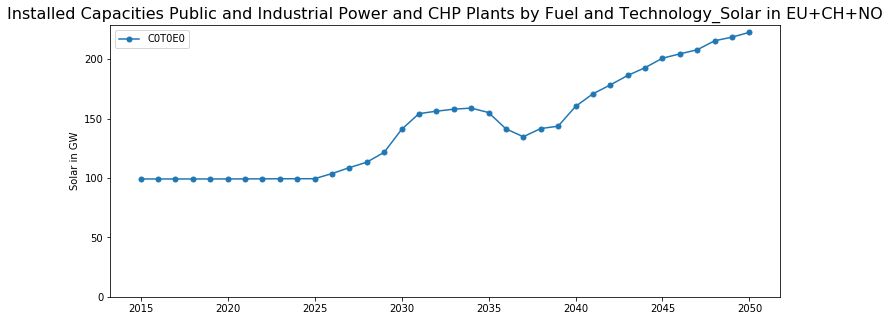

In [37]:
# Plot for one indicator and one pathway
fig = plt.figure(figsize=(12, 5))
ax = plt.subplot()
# plt.title(r'CO2-Emissions in EU28', fontsize=16)  # Manual title
plt.title(*info_dict_1['Title'], fontsize=16)         # Title from info
# plt.ylabel(r'CO2-Emissions in Mt')                # Manual label
plt.ylabel(*info_dict_1['Y-Axis'])                    # Label from info
plt.plot(df_1.loc[:,'year'], df_1.loc[:,'value'], 
         marker="o",  markersize=5)
plt.legend(df_1.loc[:,'pathway'].unique())
ax.set_ylim(ymin=0)

## Interactive Plot

This is a basic interactive plot with [Plotly](https://plot.ly/python/).<br>
You can hover over the elements of the plot and observe the data.

In [38]:
# Interactive plot for one indicator and one pathway
data = [go.Scatter(
    x = df_1.loc[:,'year'],
    y = df_1.loc[:,'value'],
    name = df_1.loc[:,'pathway'].unique())]

# Set layout
layout = go.Layout(
    height=400, width = 800,
    #title='CO2-Emissions in EU28',
    title=''.join(info_dict_1['Title']),
    # yaxis=dict(title='CO2-Emissions in Mt') )
    yaxis=dict(title=''.join(info_dict_1['Y-Axis'])) )
ifig = go.Figure(data=data, layout=layout)
pltly.iplot(ifig)

## Save results to files

The results are saved to cooresponding files in a folder named **data**.<br>
The **info_dict** is saved to a text file (txt).<br>
The **data** is saved to a table (csv).<br>
The **plot** is saved as an image (png).<br>
The **interactive plot** is saved as a webpage (html). It will also open in a new tab of your browser.

In [39]:
# Save plot as file
plotname = ('data/' + str({0}) + '/' + str({1}) +'.png').format(folder, *info_dict_1['Filename'])
fig.savefig(plotname, bbox_inches='tight')
print("Plot saved to file:", plotname)

Plot saved to file: data/osembe/2019-01-09_reeem_plot_1.png


In [40]:
# Write facts to textfile
txtname = ('data/' + str({0}) + '/' + str({1}) +'.txt').format(folder, *info_dict_1['Filename'])
with open(txtname,'w') as tfile:
    for i in info_dict_1.keys():
        tfile.write(i + ": " + ', '.join([str(x) for x in info_dict_1[i]]) + "\n")
tfile.close()
print("Facts saved to file:", txtname)

# Save data to CSV
csvname = ('data/' + str({0}) + '/' + str({1}) +'.csv').format(folder, *info_dict_1['Filename'])
df_1.to_csv(csvname, sep=';')
print("Data saved to file:", csvname)

# Save plot as file
plotname = ('data/' + str({0}) + '/' + str({1}) +'.png').format(folder, *info_dict_1['Filename'])
fig.savefig(plotname, bbox_inches='tight')
print("Plot saved to file:", plotname)

# Save interactive plot
htmlname = ('data/' + str({0}) + '/' + str({1}) +'.html').format(folder, *info_dict_1['Filename'])
pltly.plot(ifig, filename=htmlname)
print("Interactive plot saved to file:", htmlname)

Facts saved to file: data/osembe/2019-01-09_reeem_plot_1.txt
Data saved to file: data/osembe/2019-01-09_reeem_plot_1.csv
Plot saved to file: data/osembe/2019-01-09_reeem_plot_1.png
Interactive plot saved to file: data/osembe/2019-01-09_reeem_plot_1.html


# View 2: One indicator for one region in different pathways over time

## Database Query

This section can be used to query one specific **indicator** (_filter 1_) for one specific **region** (_filter 2_) from one database table (_table_).<br>
Indicators are identified by the **nid**.<br>
It is possible to select one specific **pathway** (_filter 3_) and one specific data **version** (_filter 4_).<br>
To querry additional coulmns from the database table add the names to the **SELECT** statement (_column_).<br>
The sortation is done by the **ORDER BY** (_sorting_).<br>
The result from the database is saved to a pandas.DataFrame (**df_2**) and can be printed.

In [43]:
# Database select (SQL)
sql = text("""
    SELECT  pathway, version, region, year, category, indicator, value, unit  -- column
    FROM    {0}.{1}                               -- table
    WHERE   category = 'Installed Capacities Public and Industrial Power and CHP Plants by Fuel and Technology_Solar'
        AND indicator = 'Solar'
        AND region = 'EU+CH+NO'                   -- filter 2
        AND (pathway = 'C0T0E17' 
            OR pathway = 'C0T0E18')               -- filter 3
        --AND framework = 'FrameworkV1'              
        AND version = 'DataV1'                    -- filter 4
    ORDER BY pathway, version, year;              -- sorting """.format(schema, table_out))
df_2 = pd.read_sql_query(sql, con)
print(df_2)

    pathway version    region  year  \
0   C0T0E17  DataV1  EU+CH+NO  2015   
1   C0T0E17  DataV1  EU+CH+NO  2016   
2   C0T0E17  DataV1  EU+CH+NO  2017   
3   C0T0E17  DataV1  EU+CH+NO  2018   
4   C0T0E17  DataV1  EU+CH+NO  2019   
5   C0T0E17  DataV1  EU+CH+NO  2020   
6   C0T0E17  DataV1  EU+CH+NO  2021   
7   C0T0E17  DataV1  EU+CH+NO  2022   
8   C0T0E17  DataV1  EU+CH+NO  2023   
9   C0T0E17  DataV1  EU+CH+NO  2024   
10  C0T0E17  DataV1  EU+CH+NO  2025   
11  C0T0E17  DataV1  EU+CH+NO  2026   
12  C0T0E17  DataV1  EU+CH+NO  2027   
13  C0T0E17  DataV1  EU+CH+NO  2028   
14  C0T0E17  DataV1  EU+CH+NO  2029   
15  C0T0E17  DataV1  EU+CH+NO  2030   
16  C0T0E17  DataV1  EU+CH+NO  2031   
17  C0T0E17  DataV1  EU+CH+NO  2032   
18  C0T0E17  DataV1  EU+CH+NO  2033   
19  C0T0E17  DataV1  EU+CH+NO  2034   
20  C0T0E17  DataV1  EU+CH+NO  2035   
21  C0T0E17  DataV1  EU+CH+NO  2036   
22  C0T0E17  DataV1  EU+CH+NO  2037   
23  C0T0E17  DataV1  EU+CH+NO  2038   
24  C0T0E17  DataV1  EU+C

In [44]:
# Facts dict
info_dict_2 = {}
info_dict_2['Filename'] = ['{}_reeem_plot_2' .format(pd.to_datetime('today').strftime("%Y-%m-%d"))]
info_dict_2['Category'] = df_2.loc[:,'category'].unique()
info_dict_2['Indicator'] = df_2.loc[:,'indicator'].unique()
info_dict_2['Unit'] = df_2.loc[:,'unit'].unique()
info_dict_2['Pathway'] = df_2.loc[:,'pathway'].unique()
info_dict_2['Year'] = df_2.loc[:,'year'].unique().tolist()
info_dict_2['Region'] = df_2.loc[:,'region'].unique()
info_dict_2['Y-Axis'] = ['{} in {}'.format(*info_dict_2['Indicator'], *info_dict_2['Unit'])]
info_dict_2['Title'] = ['{} in {}'.format(*info_dict_2['Category'], *info_dict_2['Region'])]
# ToDo: Select metadata string from database table and also add!

# Print facts
for x in info_dict_2:
    print(x,':',info_dict_2[x])

Filename : ['2019-01-09_reeem_plot_2']
Category : ['Installed Capacities Public and Industrial Power and CHP Plants by Fuel and Technology_Solar']
Indicator : ['Solar']
Unit : ['GW']
Pathway : ['C0T0E17' 'C0T0E18']
Year : [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050]
Region : ['EU+CH+NO']
Y-Axis : ['Solar in GW']
Title : ['Installed Capacities Public and Industrial Power and CHP Plants by Fuel and Technology_Solar in EU+CH+NO']


## Stack data

This pivot function reorganises the data and makes each pathway a column. The year is used as the index.<br>
The result is saved to a new dataframe (**df_2p**) and can be printed.

In [45]:
# Reshape dataframe
df_2p = df_2.pivot(index='year', columns='pathway',  values='value')
# print (df_2p)

## Plot

This is a basic plot with [matplotlib](https://matplotlib.org/).<br>
The title and y-axis labels are taken from the **info_dict_2**. They can be exchanged with manual text.

(0, 275.88263001082277)

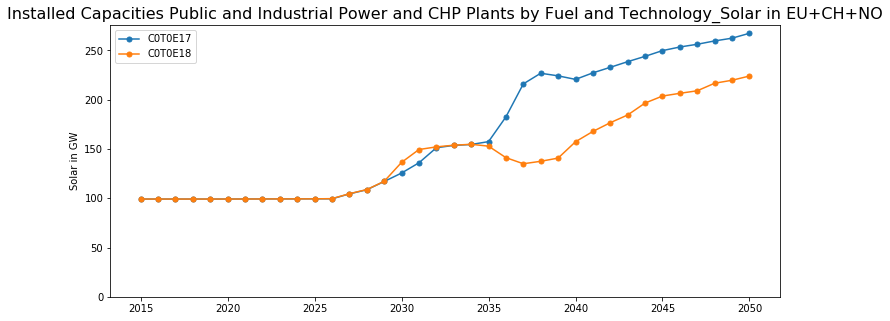

In [46]:
# Plot for one indicator and one pathway
fig_2 = plt.figure(figsize=(12, 5))
ax = plt.subplot()
# plt.title(r'CO2-Emissions in EU28', fontsize=16)  # Manual title
plt.title(*info_dict_2['Title'], fontsize=16)         # Title from info
# plt.ylabel(r'CO2-Emissions in Mt')                # Manual label
plt.ylabel(*info_dict_2['Y-Axis'])                    # Label from info
plt.plot(df_2p, 
         marker="o",  markersize=5)
plt.legend(df_2p)
ax.set_ylim(ymin=0)

## Interactive Plot

This is a basic interactive plot with [Plotly](https://plot.ly/python/).<br>
You can hover over the elements of the plot and observe the data.<br>
The different pathways can be switched on and off.

In [47]:
# Iterate over pathways and add to data
pathways = df_2.loc[:,'pathway'].unique()
data = []
for pathway in pathways:
    data.append(go.Scatter(
        x = df_2.loc[df_2['pathway'] == pathway].loc[:,'year'],
        y = df_2.loc[df_2['pathway'] == pathway].loc[:,'value'],
        name = pathway))

# Set layout
layout = go.Layout(
    height=400, width = 800,
    #title='CO2-Emissions in EU28',
    title=''.join(info_dict_2['Title']),
    # yaxis=dict(title='CO2-Emissions in Mt') )
    yaxis=dict(title=''.join(info_dict_2['Y-Axis'])) )
ifig = go.Figure(data=data, layout=layout)
pltly.iplot(ifig)

## Interactive Plot 2

This is the manual interactive version.<br>
You can control the design using the [plotly documentation](https://plot.ly/python/line-and-scatter/#line-and-scatter-plots).

In [48]:
data = [go.Scatter(x=df_2.loc[df_2['pathway'] == 'Base'].loc[:,'year'],
                   y=df_2.loc[df_2['pathway'] == 'Base'].loc[:,'value'],
                   mode='lines+markers',
                   line=dict(color='black', dash='none', width='2'),
                   marker=dict(symbol='o', size=8, line=dict(width=2, color='black')),
                   name='Base'
                  ),
        go.Scatter(x=df_2.loc[df_2['pathway'] == 'HighRES'].loc[:,'year'],
                   y=df_2.loc[df_2['pathway'] == 'HighRES'].loc[:,'value'],
                   mode='lines+markers',
                   line=dict(color='green', dash='', width='2'),
                   marker=dict(symbol='o', size=5, line=dict(width=2, color='black')),
                   name='HighRES'
                  ),
        go.Scatter(x=df_2.loc[df_2['pathway'] == 'StorageInnov'].loc[:,'year'],
                   y=df_2.loc[df_2['pathway'] == 'StorageInnov'].loc[:,'value'],
                   line=dict(color='red', dash='dash', width='2'),
                   marker=dict(symbol='o', size=5, line=dict(width=2, color='black')),
                   name='StorageInnov'
                  )
       ]
layout = go.Layout(
    height=400, width = 800,
    #title='CO2-Emissions in EU28',
    title=''.join(info_dict_2['Title']),
    # yaxis=dict(title='CO2-Emissions in Mt') )
    yaxis=dict(title=''.join(info_dict_2['Y-Axis'])) )
ifig2 = go.Figure(data=data, layout=layout)
pltly.iplot(ifig2)

## Save results to files

The results are saved to cooresponding files in a folder named **data**.<br>
The **info_dict** is saved to a text file (txt).<br>
The **data** is saved to a table (csv).<br>
The **plot** is saved as an image (png).<br>
The **interactive plot** is saved as a webpage (html). It will also open in a new tab of your browser.<br>

In [49]:
# Write facts to textfile
filename = ('data/{}.txt').format(*info_dict_2['Filename'])
with open(filename,'w') as tfile:
    for i in info_dict_2.keys():
        tfile.write(i + ": " + ', '.join([str(x) for x in info_dict_2[i]]) + "\n")
tfile.close()
print("Facts saved to file:", filename)

# Save data to CSV
csvname = 'data/{}.csv' .format(*info_dict_2['Filename'])
df_2.to_csv(csvname, sep=';')
print("Data saved to file:", csvname)

# Save pivot data to CSV
csvname = 'data/{}_pivot.csv' .format(*info_dict_2['Filename'])
df_2p.to_csv(csvname, sep=';')
print("Data saved to file:", csvname)

# Save plot as file
plotname = 'data/{}.png' .format(*info_dict_2['Filename'])
fig_2.savefig(plotname, bbox_inches='tight')
print("Plot saved to file:", plotname)

# Save interactive plot
htmlname = 'data/{}.html' .format(*info_dict_2['Filename'])
pltly.plot(ifig, filename=htmlname)
print("Interactive plot saved to file:", htmlname)

# Save interactive plot 2
htmlname = 'data/{}_2.html' .format(*info_dict_2['Filename'])
pltly.plot(ifig2, filename=htmlname)
print("Interactive plot saved to file:", htmlname)

Facts saved to file: data/2019-01-09_reeem_plot_2.txt
Data saved to file: data/2019-01-09_reeem_plot_2.csv
Data saved to file: data/2019-01-09_reeem_plot_2_pivot.csv
Plot saved to file: data/2019-01-09_reeem_plot_2.png
Interactive plot saved to file: data/2019-01-09_reeem_plot_2.html
Interactive plot saved to file: data/2019-01-09_reeem_plot_2_2.html


# View 3: One indicator for all regions in one pathway over time

## Database Query

This section can be used to query one specific **indicator** for all regions from one database table (_table_).<br>
Indicators are identified by the **nid** (_filter 1_).<br>
Only **region** _EU28_ is excluded (_filter 2_).<br>
It is possible to select one specific **pathway** (_filter 3_) and one specific data **version** (_filter 4_).<br>
To querry additional coulmns from the database table add the names to the **SELECT** statement (_column_).<br>
The sortation is done by the **ORDER BY** (_sorting_).<br>
The result from the database is saved to a pandas.DataFrame (**df_3**) and can be printed.

In [ ]:
# Database select (SQL)
sql = text("""
    SELECT  pathway, version, region, year, nid, indicator, field, value, unit  -- column
    FROM    model_draft.reeem_osembe_output       -- table
    WHERE nid = 59                                -- filter 1
        AND region <> 'EU28'                      -- filter 2
        AND pathway = 'Base'                      -- filter 3
        AND version = 'DataV1'                    -- filter 4
    ORDER BY pathway, version, region, year;      -- sorting """)
df_3 = pd.read_sql_query(sql, con)
print(df_3)

## Metadata

The important information from the above select (**df_3**) is collected in a Dictionary (**info_dict_3**).

In [ ]:
# Facts dict
info_dict_3 = {}
info_dict_3['Filename'] = ['{}_reeem_plot_3' .format(pd.to_datetime('today').strftime("%Y-%m-%d"))]
info_dict_3['Field'] = df_3.loc[:,'field'].unique()
info_dict_3['Indicator'] = df_3.loc[:,'indicator'].unique()
info_dict_3['Unit'] = df_3.loc[:,'unit'].unique()
info_dict_3['Pathway'] = df_3.loc[:,'pathway'].unique()
info_dict_3['Year'] = df_3.loc[:,'year'].unique().tolist()
info_dict_3['Region'] = df_3.loc[:,'region'].unique()
info_dict_3['Y-Axis'] = ['{} in {}'.format(*info_dict_3['Indicator'], *info_dict_3['Unit'])]
info_dict_3['Title'] = ['{} in all regions'.format(*info_dict_3['Indicator'])]
# ToDo: Select metadata string from database table and also add!

# Print facts
for x in info_dict_3:
    print(x,':',info_dict_3[x])

## Stack data

This pivot function reorganises the data and makes each pathway a column. The year is used as the index.<br>
The result is saved to a new dataframe (**df_3p**) and can be printed.

In [ ]:
# Reshape dataframe
df_3p = df_3.pivot(index='year', columns='region',  values='value')
# print (df_3p)

## Plot

This is a basic plot with [matplotlib](https://matplotlib.org/).<br>
The title and y-axis labels are taken from the **info_dict_3**. They can be exchanged with manual text.

In [ ]:
# Plot for one indicator and one pathway
fig = plt.figure(figsize=(12, 10))
ax = plt.subplot()
# plt.title(r'CO2-Emissions in all regions', fontsize=16)  # Manual title
plt.title(*info_dict_3['Title'], fontsize=16)         # Title from info
# plt.ylabel(r'CO2-Emissions in Mt')                # Manual label
plt.ylabel(*info_dict_3['Y-Axis'])                    # Label from info
plt.plot(df_3p, 
         marker="o",  markersize=5)
plt.legend(df_3p)
ax.set_ylim(ymin=0)

## Interactive Plot

This is a basic interactive plot with [Plotly](https://plot.ly/python/).<br>
You can hover over the elements of the plot and observe the data.<br>
The different pathways can be switched on and off.

In [ ]:
# Iterate over pathways and add to data
regions = df_3.loc[:,'region'].unique()
data = []
for region in regions:
    data.append(go.Scatter(
        x = df_3.loc[df_3['region'] == region].loc[:,'year'],
        y = df_3.loc[df_3['region'] == region].loc[:,'value'],
        name = region))

# Set layout
layout = go.Layout(
    height=800, width = 800,
    #title='CO2-Emissions in EU28',
    title=''.join(info_dict_3['Title']),
    # yaxis=dict(title='CO2-Emissions in Mt') )
    yaxis=dict(title=''.join(info_dict_3['Y-Axis'])) )
ifig = go.Figure(data=data, layout=layout)
pltly.iplot(ifig)

# Combined

In [ ]:
# Database select (SQL)
sql = text("""
    SELECT  pathway, version, region, year, nid, indicator, field, value, unit  -- column
    FROM    model_draft.reeem_osembe_output       -- table
    WHERE nid = 59                                -- filter 1
        AND region <> 'EU28'                      -- filter 2
        AND pathway = 'Base'                      -- filter 3
        AND version = 'DataV1'                    -- filter 4
    ORDER BY pathway, version, region, year;      -- sorting """)
df_3 = pd.read_sql_query(sql, con)
# print(df_3)

# Facts dict
info_dict_3 = {}
info_dict_3['Filename'] = ['{}_reeem_plot_3' .format(pd.to_datetime('today').strftime("%Y-%m-%d"))]
info_dict_3['Field'] = df_3.loc[:,'field'].unique()
info_dict_3['Indicator'] = df_3.loc[:,'indicator'].unique()
info_dict_3['Unit'] = df_3.loc[:,'unit'].unique()
info_dict_3['Pathway'] = df_3.loc[:,'pathway'].unique()
info_dict_3['Year'] = df_3.loc[:,'year'].unique().tolist()
info_dict_3['Region'] = df_3.loc[:,'region'].unique()
info_dict_3['Y-Axis'] = ['{} in {}'.format(*info_dict_3['Indicator'], *info_dict_3['Unit'])]
info_dict_3['Title'] = ['{} in all regions'.format(*info_dict_3['Indicator'])]
# ToDo: Select metadata string from database table and also add!

# Print facts
# for x in info_dict_3:
#     print(x,':',info_dict_3[x])

# Reshape dataframe
df_3p = df_3.pivot(index='year', columns='region',  values='value')
# print (df_3p)

# Iterate over pathways and add to data
regions = df_3.loc[:,'region'].unique()
data = []
for region in regions:
    data.append(go.Scatter(
        x = df_3.loc[df_3['region'] == region].loc[:,'year'],
        y = df_3.loc[df_3['region'] == region].loc[:,'value'],
        name = region))

# Set layout
layout = go.Layout(
    height=800, width = 800,
    #title='CO2-Emissions in EU28',
    title=''.join(info_dict_3['Title']),
    # yaxis=dict(title='CO2-Emissions in Mt') )
    yaxis=dict(title=''.join(info_dict_3['Y-Axis'])) )
ifig = go.Figure(data=data, layout=layout)
pltly.iplot(ifig)

# View 5: All indicators for all regions in one pathway over time

## Database Query

This section can be used to query all **indicator** for all regions from one database table (_table_).<br>
It is possible to select one specific **pathway** (_filter 1_) and one specific data **version** (_filter 2_).<br>
To querry additional coulmns from the database table add the names to the **SELECT** statement (_column_).<br>
The sortation is done by the **ORDER BY** (_sorting_).<br>
The result from the database is saved to a pandas.DataFrame (**df_5**) and can be printed.

In [ ]:
# Database select (SQL)
sql = text("""
    SELECT  id, nid, pathway, framework, version, 
        region, year, field, indicator, value, 
        unit, aggregation, updated  -- column
    FROM    model_draft.reeem_osembe_output       -- table
    WHERE pathway = 'Base'                        -- filter 1
        AND version = 'DataV1'                    -- filter 2
    ORDER BY pathway, version, region, year;      -- sorting """)
df_5 = pd.read_sql_query(sql, con)
df_5.head(5)

## Metadata

The important information from the above select (**df_5**) is collected in a Dictionary (**info_dict_5**).

In [ ]:
# Facts dict
info_dict_5 = {}
info_dict_5['Updated'] = [x.strftime("%Y-%m-%d") for x in df_5.loc[:,'updated'].unique()]
info_dict_5['Filename'] = ['{0}_{1}_OSeMBE_{2}_{3}_Output' .format(
    info_dict_5['Updated'][0],
    df_5.loc[:,'pathway'].unique()[0],
    df_5.loc[:,'framework'].unique()[0],
    df_5.loc[:,'version'].unique()[0])]
#info_dict_5['Category'] = df_5.loc[:,'category'].unique()
#info_dict_5['Indicator'] = df_5.loc[:,'indicator'].unique()
#info_dict_5['Unit'] = df_5.loc[:,'unit'].unique()
info_dict_5['Pathway'] = df_5.loc[:,'pathway'].unique()
info_dict_5['Version'] = df_5.loc[:,'version'].unique()
info_dict_5['Year'] = df_5.loc[:,'year'].unique().tolist()
info_dict_5['Region'] = df_5.loc[:,'region'].unique()
#info_dict_5['Y-Axis'] = ['{} in {}'.format(*info_dict_5['Indicator'], *info_dict_5['Unit'])]
#info_dict_5['Title'] = ['{} in all regions'.format(*info_dict_5['Category'])]
info_dict_5['Metadata'] = df_meta

# Print facts
for x in info_dict_5:
    print(x,':',info_dict_5[x])

## Save results to files

The results are saved to cooresponding files in a folder named **data**.<br>
The **info_dict** is saved to a text file (txt).<br>
The **data** is saved to a table (csv).<br>

In [ ]:
# Write facts to textfile
filename = ('data/{}.txt').format(*info_dict_5['Filename'])
with open(filename,'w') as tfile:
    for i in info_dict_5.keys():
        tfile.write(i + ": " + ', '.join([str(x) for x in info_dict_5[i]]) + "\n")
tfile.close()
print("Facts saved to file:", filename)

# Save data to CSV
csvname = 'data/{}.csv' .format(*info_dict_5['Filename'])
df_5.to_csv(csvname, sep=';')
print("Data saved to file:", csvname)

# Logging

In [50]:
%%javascript
var nb = IPython.notebook;
var kernel = IPython.notebook.kernel;
var command = "nb_name = '" + nb.notebook_path + "'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [51]:
print(nb_name)

reeem_db_plot_OSeMBE.ipynb


In [52]:
# Database select (SQL)
sql = text("""
    -- scenario log (project,version,io,schema_name,table_name,script_name,comment)
    SELECT scenario_log('REEEM','v0.3.0','view','{0}','{1}','{2}',' ');
    """.format(schema, table_out, nb_name))
df_2 = pd.read_sql_query(sql, con)
print(df_2)

  scenario_log
0     inserted
